In [89]:
# Things to do:

    # Regex out a clean seriesname at some point

In [90]:
#Necessary packages
import pandas as pd
import requests
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import calendar
import math
import os, time
import re

import plotly.express as px
import plotly.graph_objects as go

from matplotlib import rc
    #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'serif','serif':['Times']})

import warnings
warnings.filterwarnings('ignore')

In [91]:
#x = datetime(2024, 5, 16, 11, 30)
#print(x)

In [92]:
# The location - is now date dependent

#Set Timezone
os.environ['TZ'] = 'Australia/NSW'
time.tzset()

url = 'https://www.abs.gov.au/statistics/labour/employment-and-unemployment/labour-force-australia/latest-release/6202001.xlsx'

In [93]:
# Get the file
resp = requests.get(url)

In [94]:
# Open a new file to save down as
output = open('6202001.xlsx', 'wb')
output.write(resp.content)
output.close()

In [95]:
dataSetLF = pd.read_excel('6202001.xlsx', 'Data1');

##ABS Labour Force

In [96]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
current_date = now.strftime("%d-%m-%Y")
current_date_and_time = now.strftime("%H:%M:%S %d-%m-%Y")
#print("Graphs updated at " + current_time + " on " + current_date)
print("Graphs and data updated at " + current_time + " on " + current_date)


Graphs and data updated at 13:15:27 on 05-07-2024


In [97]:
metaDataDict = {}

for col in dataSetLF:
    #print('A new column')
    #print(col)
    unit = dataSetLF[col][0]
    #print(seasAdjust)
    seasAdjust = dataSetLF[col][1]
    #print(seasAdjust)
    dataType = dataSetLF[col][2]
    #print(dataType)
    frequency = dataSetLF[col][3]
    #print(frequency)
    collectionMonth = dataSetLF[col][4]
    #print(collectionMonth)
    startDate = dataSetLF[col][5]
    #print(startDate)
    endDate = dataSetLF[col][6]
    #print(endDate)
    numberObs = dataSetLF[col][7]
    #print(numberObs)
    seriesNumber = dataSetLF[col][8]
    #print(seriesNumber)
    
    dictName = seriesNumber

    
    
    seriesDict = {
    "seriesName" : col,
    "unit" : unit,
    "seriesType" : seasAdjust,
    "dataType" : dataType,
    "startDate" : startDate,
    "endDate" : endDate,
    "seriesNumber" : seriesNumber
    }

    #Cleaning up the series name
    
    string = seriesDict["seriesName" ]
    pattern = r"\.\d"
    replacement = ""

    new_string = re.sub(' ; ', ';', string)
    new_string = re.sub(' >', '', new_string)
    new_string = re.sub('>', '', new_string)
    new_new_string = re.sub('\.\d', '', new_string)

    seriesDict["seriesName"] = new_new_string
    
    metaDataDict[seriesNumber] = seriesDict
    

In [98]:
# Name the columns after the ABS series ID and fix the date column

dataSetLF.columns = dataSetLF.iloc[8];

dataSetLF = dataSetLF[9:]

dataSetLF.columns = dataSetLF.columns.str.replace('Series ID', 'Date') #Rename the date column

#dataSetLF.head(10)


In [99]:
last_data = dataSetLF["Date"].iloc[-1]
print("Most recent data is for "+ calendar.month_name[last_data.month] 
      + " " + str(last_data.year))

Most recent data is for May 2024


In [100]:
def graph_series_abs(seriesCode, data, startDate, endDate, lastPointOption, metaData):
    
    metaData = metaDataDict[seriesCode]
    
    #print(metaData)
    
    seriesName = metaData.get('seriesName')
    #print(seriesName)

    mystring=seriesName

    mystring = mystring.split(';')

    seriesType = metaData.get('seriesType')

    title_string = mystring[0] + ":" + mystring[1] + '<br>' + seriesType

    my_yaxis_title = 'blank'

    #print(metaDataDict[seriesCode].get('dataType'))
    
    if metaData.get('dataType')== 'PERCENT':
        my_yaxis_title="%"
    elif metaData.get('dataType') == 'STOCK':
        my_yaxis_title="Thousands"
        
    layout = dict(
    title=title_string,
    title_x=0.5,
    title_y = 0.9,
    hovermode="x",
    #title_font_family="DIN OT",
    title_font_size=14,
    title_font_color="black",
    yaxis_title=my_yaxis_title
    )

    
    
    #Just hashed out for a test
    plt.rcParams.update({'font.size': 10})
    font = {'size'   : 10}
    matplotlib.rc('font', **font)
    

    
    # Create a figure containing a single axes.
    fig = px.line(data,  x="Date", y=seriesCode, width=500, height=400, range_x=[startDate,endDate]) 

    
    #fig.axhline(y=0.0, color='black', linestyle='-', linewidth= '1')
    
    # Get the last data point for highlighting 
    #lastData = dataToGraph.values[-1]
    #lastDate = datesToGraph.values[-1]
    
    # X-ticks set as calculated above
    #ax.set_xticks(yearsToGraph)
    
    # Get a data range for the date range being used
    mask = (data.loc[:,'Date'] > startDate) & (data.loc[:,'Date'] < endDate)
    values = data[seriesCode]
    dataToGraph = values.loc[mask]

    #print(dataToGraph)

    y_data_max = dataToGraph.max()
    y_data_min = dataToGraph.min()
    diff = y_data_max - y_data_min
    
    y_max = y_data_max + diff * .1
    y_min = y_data_min - diff * .1
    
    fig.update_yaxes(title=' ')
    fig.update_xaxes(title=' ')
    fig.update_yaxes(range = [y_min, y_max])

    fig.update_layout(layout)
    
    return fig


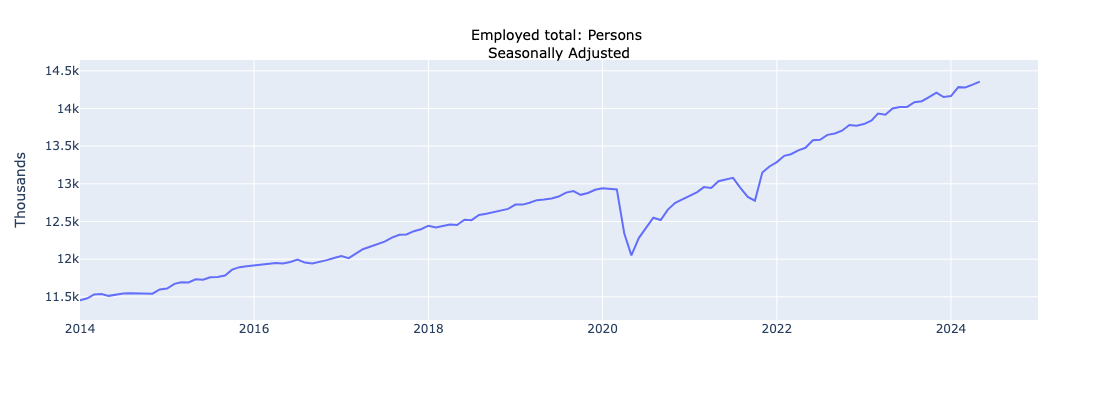

In [101]:
startDateExample = datetime(2014, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A84423043C'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)

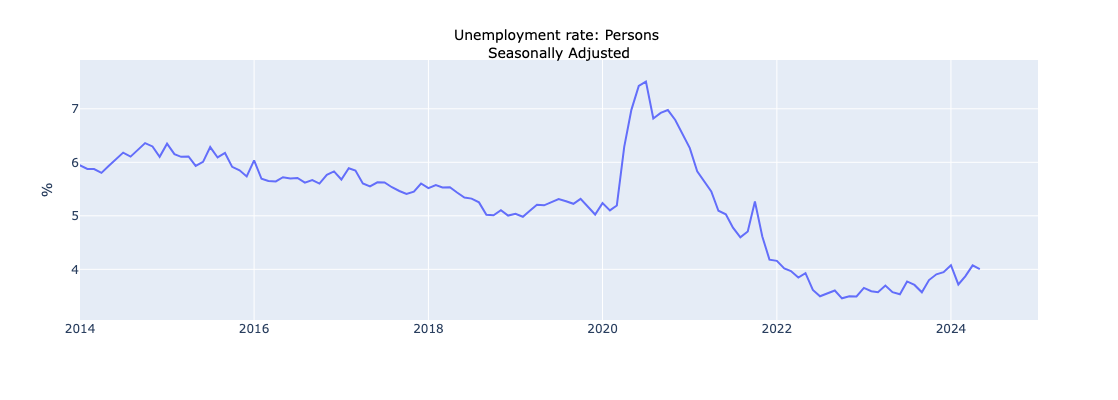

In [102]:
startDateExample = datetime(2014, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A84423050A'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)

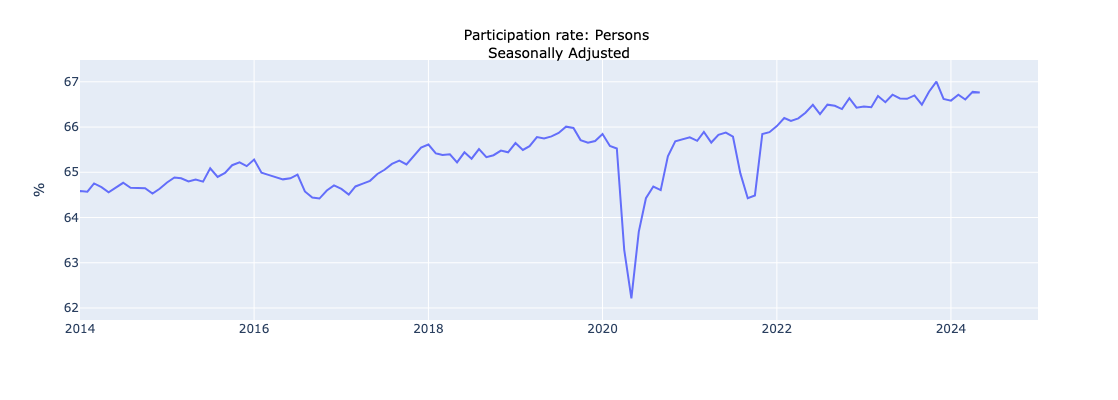

In [103]:
startDateExample = datetime(2014, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A84423051C'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)

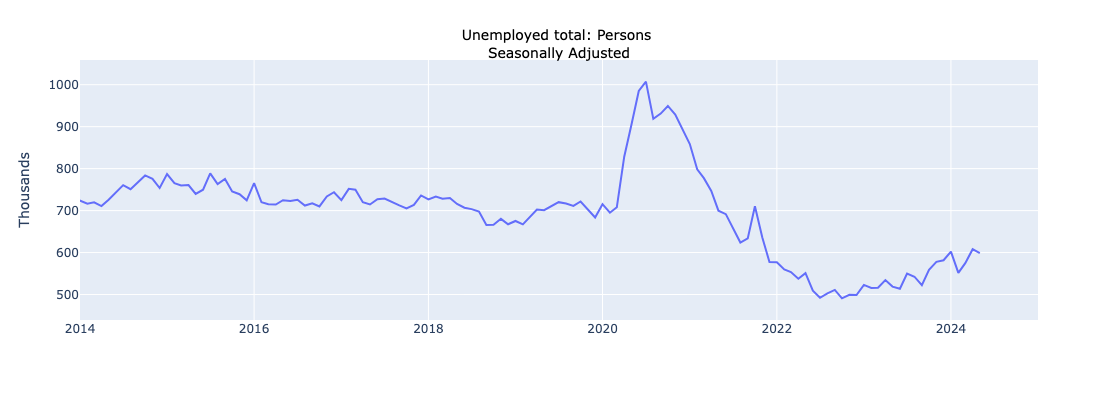

In [104]:
startDateExample = datetime(2014, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A84423046K'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)



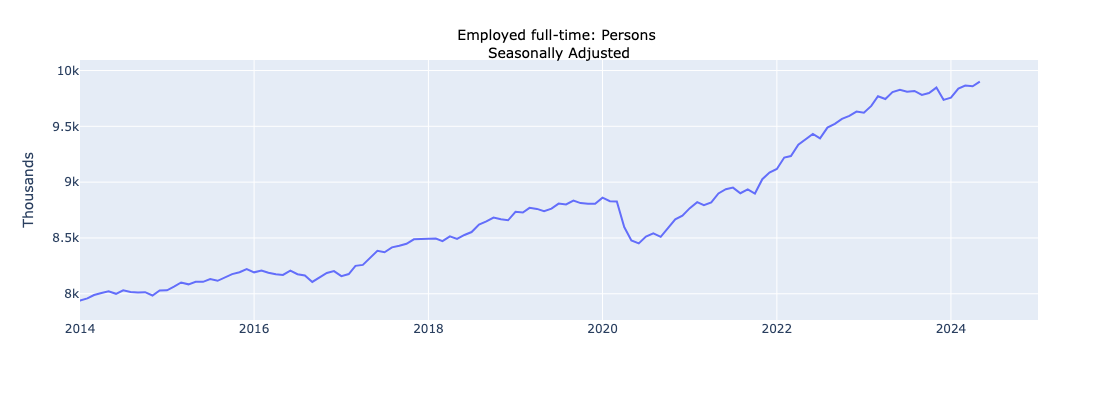

In [105]:
startDateExample = datetime(2014, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A84423041X'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)


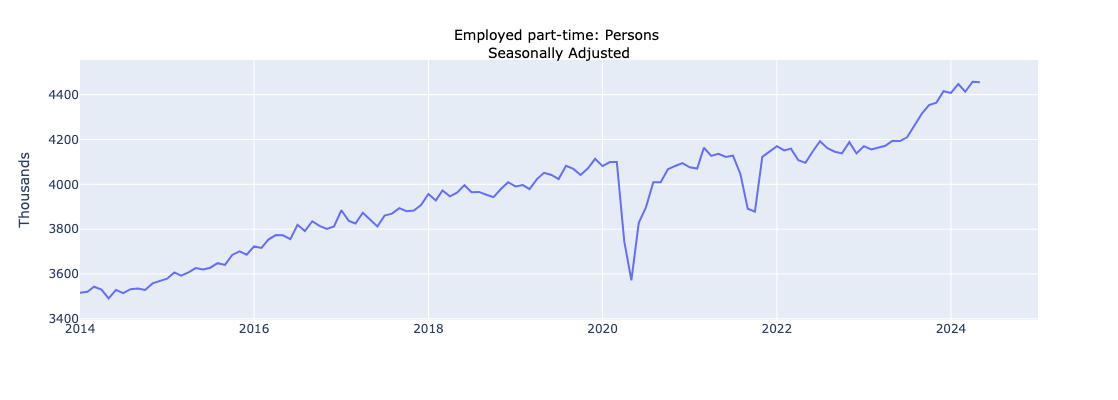

In [106]:
startDateExample = datetime(2014, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A84423042A'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)


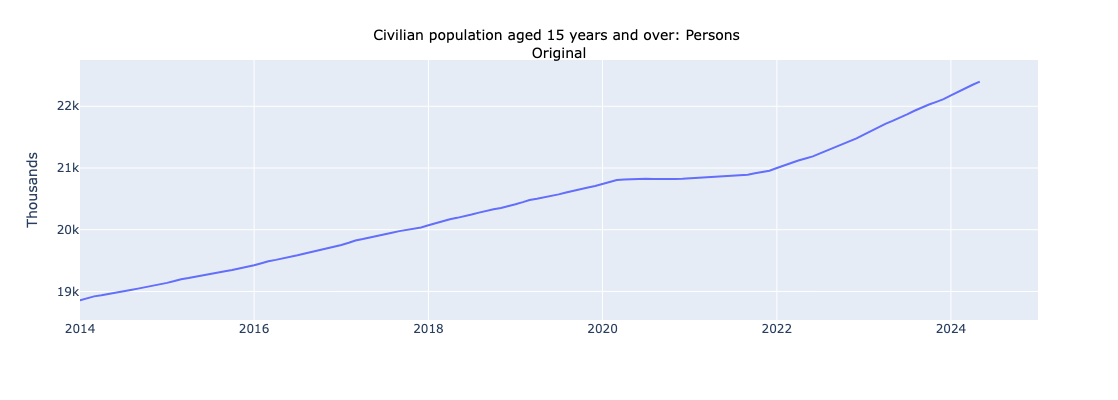

In [107]:
startDateExample = datetime(2014, 1, 1)
endDateExample = datetime(2024, 12, 31)
seriesToGraph = 'A84423091W'

graph_series_abs(seriesToGraph, dataSetLF, startDateExample, endDateExample,1, metaDataDict)